In [1]:
import networkx as nx
import numpy as np

import holoviews as hv; hv.extension('bokeh', 'plotly', 'matplotlib', logo=False)
import panel as pn;     pn.extension('plotly', 'katex', 'mathjax')

import alg_graphs.alg_graphs as aG

<div style="float:center;width:100%;text-align: center;"><strong style="height:60px;color:darkred;font-size:40px;">Other Matrix Representations</strong></div>

# 1. Notebook Contents

Definition and Examples of
* Incidence Matrix
* Path Matrix
* Degree Matrix
* Laplacian

Relationship between Number of Components and the rank of the Oriented Incidence Matrix

**Visualization**
* **networkx:**  draw_nx_graph, draw_nx_multigraph  (these use matplotlib)

# 2. Incidence Matrix

<div style="background-color:#F2F5A9;color:black;">

**Definition:** For a **graph** $G$ of order $n$ and size $m$, the (unoriented) **incidence matrix**, denoted $Q(G)$, of $G$<br>
$\qquad$ is an $n \times m$ matrix whose $(i,j)^{th}$ entry is given by<br><br>
$\qquad
Q_{i j} = \left\{ \begin{align}
& 1, \qquad & \text{ if vertex }\; v_i\; \text{ is incident to edge }\; e_j \\
& 0,        & \text{ otherwise}
\end{align}\right.
$

**Definition:** For a **digraph** $G$ of order $n$ and size $m$, the **incidence matrix**, denoted $Q(G)$, of $G$<br>
$\qquad$ is an $n \times m$ matrix whose $(i,j)^{th}$ entry is given by<br><br>
$\qquad
Q_{i j} = \left\{ \begin{align}
& -1, \qquad & \text{ if edge }\; e_j\; \text{ leaves vertex }\; v_i \\
& \;\;1, \qquad & \text{ if edge }\; e_j\; \text{ enters vertex }\; v_i \\
& \;\;0,        & \text{ otherwise}
\end{align}\right.
$
</div>

#### Example

<strong style="font-size:20px;height:25px;color:blue;"><p>A Graph and its Incidence matrix representation (Vertex vs Edge)</p></strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=200)
    [1] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')
    [2] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')
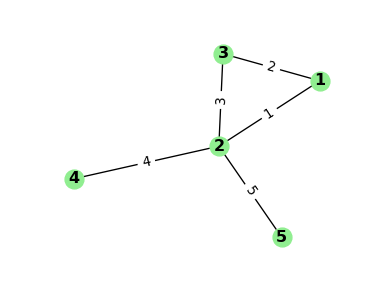

In [2]:
G = nx.Graph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (2,5)])
Q  = nx.incidence_matrix(G).todense()
oQ = nx.incidence_matrix(G, oriented=True).todense()

aG.pr("<p>A Graph and its Incidence matrix representation (Vertex vs Edge)</p>")
pn.Row( pn.pane.Matplotlib( aG.draw_nxgraph(G,edge_labels=True, directed=True), dpi=96,  height=200),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( '$Q(G) = '+aG.format_matrix(Q.astype(int), False)+'$' )),
        pn.Column(pn.Spacer(height=50),
                  pn.pane.LaTeX( 'Oriented $Q(G) = '+aG.format_matrix(oQ.astype(int), False)+'$' ),
      ))

Thus, the third row shows that node 3 is incident to edge 2 and edge 3

The incidence matrix of a Graph can be converted to an **oriented incidence matrix**<br>
$\qquad$ by arbitrarily assigning an orientation to each edge in the graph, i.e.,<br>
$\qquad$ by changing the sign of one of the two nonzero entries in each column of the incidence matrix.

**Remark:**
* The columns represent the vertices associated with a given edge, and hence sum to 2
* The columns of an oriented incidence matrix sum to zero, i.e., the sum of the rows equals 0
    * the rows of an oriented incidence matrix are therefore linearly dependent
    * any one row of an oriented incidence matrix can be written as a linear combination of the others.
    * **Lemma:** If $G$ is a **connected graph** on $n$ vertices and $Q(G)$ is an oriented incidence matrix,<br>
    then $\;rank\ Q(G) = n − 1$.

<div style="background-color:#F2F5A9;color:black;">

**Definition:** A graph $G$ is **connected** iff there exists a path between any two vertices in the graph.<br>
$\qquad$ otherwise, $G$ is **disconnected.**

$\qquad$ Each connected subsection of a graph $G$ is a **component** of $G$.

**Theorem:** If $G$ is a graph on $n$ vertices and has $k$ connected components then $\;rank\ Q(G) = n − k$,<br>
$\qquad$ where $Q(G)$ is an oriented incidence matrix of $G$.
</div>

<strong style="font-size:20px;height:25px;color:blue;"><p>A Graph with 3 components and its oriented Incidence matrix representation</p></strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=200)
    [1] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')
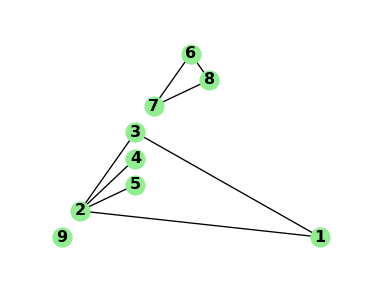

In [3]:
G = nx.Graph()
G.add_node( 9 )
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (2,5), (6,7),(6,8),(7,8)])
Q = nx.incidence_matrix(G, oriented=True).todense()

aG.pr("<p>A Graph with 3 components and its oriented Incidence matrix representation</p>")
pn.Row( pn.pane.Matplotlib( aG.draw_nxgraph(G, layout=nx.planar_layout), dpi=96,  height=200),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( 'Oriented $Q(G) = '+aG.format_matrix(Q.astype(int))+'$' )),
      )

In [4]:
aG.pr( f"The number of components of G is {Q.shape[0]-np.linalg.matrix_rank(Q)}")

<strong style="font-size:20px;height:25px;color:blue;">The number of components of G is 3</strong>

# 3. Path Matrices

<div style="background-color:#F2F5A9;color:black;">

Let $G$ be a graph with size $m$ and let $u, v \in V(G)$ be any two vertices $G$.<br>
$\qquad$ The path matrix $P(u,v)$ for vertices $u$ and $v$ is the $q$ by $m$ matrix, where $q$ is the
number of different paths between $u$ and $v$, given by<br>
$\qquad P(u, v)_{i j} = \left\{\begin{align} 
1,&\quad & \text{if edge }\ e_j \text{ lies in the }\ i^{th}\text{ path} \\
0,& & \text{ otherwise}
\end{align}\right.$
</div>

In other words,
* the rows of $P(u, v)$ correspond to the different paths from vertex $u$ to vertex $v$
* the columns of $P(u, v)$ correspond to each edge in graph $G$

In [5]:
def path_matrix( G, u,v):
    paths = [i for i in nx.all_simple_paths(G, u, v)]
    q = len(paths)
    P = np.zeros((q,G.number_of_edges()), dtype=int)
    for i,p in enumerate(paths):
        for j in p: P[i,j-1]=1
    return P

<strong style="font-size:20px;height:25px;color:blue;"><p>A Graph and its Path matrix for Verices 2 and 4</p></strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=200)
    [1] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')
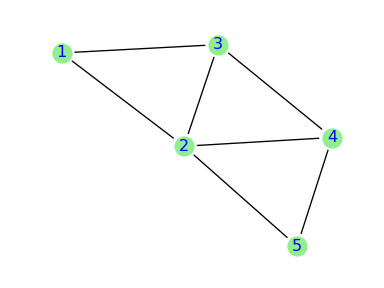

In [6]:
G = nx.MultiGraph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(2,1), (1,3), (2,3), (2,4), (2,5), (5,4), (4,3)])

P = path_matrix(G,2,4)

aG.pr("<p>A Graph and its Path matrix for Verices 2 and 4</p>")
pn.Row( pn.pane.Matplotlib( aG.draw_nxmultigraph(G, nx.spring_layout, arrows='-'), dpi=96,  height=200),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( 'Path Matrix $P(2,4) = '+aG.format_matrix(P)+'$' )))

# 4. The Degree Matrix

<div style="background-color:#F2F5A9;color:black;">

**Definition:** The degree matrix $D(G)$ of a graph $G$ of order $n$ is a diagonal matrix with<br>
$\qquad
D_{i j} = \left\{ \begin{align}
& \deg(v_i), \qquad & \text{ if } i = j, \\
& 0,        & \text{ otherwise}
\end{align}\right.
$

<div style="padding-left: 30px;">

The function $\deg(v_{i})$ of a vertex $v_i$ counts the number of times an edge terminates at that vertex.
* In an undirected graph, this means that each loop increases the degree of a vertex by two.
* In a directed graph, the term degree may refer either to indegree (the number of incoming edges at each vertex)<br>
or outdegree (the number of outgoing edges at each vertex).
</div></div>

<strong style="font-size:20px;height:25px;color:blue;"><p>A Graph and its Degree Matrix</p></strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=200)
    [1] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')
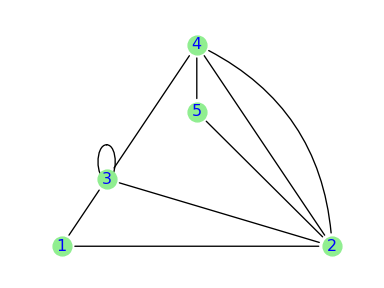

In [7]:
G = nx.MultiGraph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(2,1), (1,3), (2,3), (2,4), (2,5), (5,4), (4,3), (3,3),(2,4)])
D = np.diag([ d for i,d in G.degree()])

aG.pr("<p>A Graph and its Degree Matrix</p>")
pn.Row( pn.pane.Matplotlib( aG.draw_nxmultigraph(G, nx.planar_layout, arrows='-'), dpi=96,  height=200),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( 'Degree Matrix $D = '+aG.format_matrix(D)+'$' )))

For directed paths, we can further define an Indegree and an outdegree matrix:

<strong style="font-size:20px;height:25px;color:blue;"><p>A directed Graph and its degree matrices</p></strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=200)
    [1] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')
    [2] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')
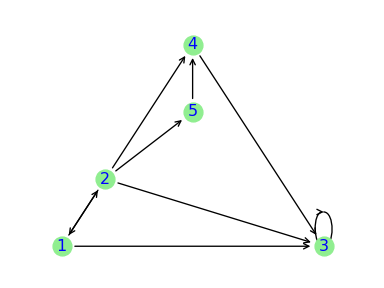

In [8]:
G = nx.MultiDiGraph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(2,1), (1,3), (2,3), (2,4), (2,5), (5,4), (4,3), (3,3),(1,2)])
inD  = np.diag([ d for i,d in G.in_degree()])
outD = np.diag([ d for i,d in G.out_degree()])

aG.pr("<p>A directed Graph and its degree matrices</p>")
pn.Row( pn.pane.Matplotlib( aG.draw_nxmultigraph(G, nx.planar_layout, arrows='->'), dpi=96,  height=200),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( 'Indegree Matrix $D_{in} = '+aG.format_matrix(inD)+'$' )),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( 'Outdegree Matrix $D_{out} = '+aG.format_matrix(outD)+'$' ))
      )

# 5. The Laplacian Matrix

Given a weighted graph $G= (V, E, W)$ we consider the quadratic form<br>
$\qquad x^t\ W L\ x = \sum_{(a,b) \in E}{\ w_{a b}\ \left( x_a - x_b \right)^2}$

where the vector $x : V(G) \rightarrow \mathbb{R}$ defines a value associated with each node,<br>
$\qquad w_{a b}$ are positive weights associated with each edge,<br>
$\qquad$ and the sum includes every edge in $G$.

<div style="background-color:#F2F5A9;color:black;">

**Definition:** Given a weighted graph $G= (V, E, W)$ the **Laplacian** $L(G)$ is the symmetric matrix $L$ defined<br>
$\qquad$ by the quadratic form $\sum_{(a,b) \in E}{\ w_{a b}\ \left( x_a - x_b \right)^2}.$
</div>

Since $(x_a - x_b)^2 = x_a^2 - 2 x_a x_b + x_b^2$, we obtain<br>
$\qquad x^t\ W L\ x =     \sum_{(a,b) \in E}{w_{a b} x_a^2}
                    - 2 \sum_{(a,b) \in E}{w_{a b} x_a x_b } + \sum_{(a,b) \in E}{w_{a b} x_b^2}$

The $x_a^2$ and $x_b^2$ terms correspond to the in and out degrees of particular vertices, and sum to the degree of each particular vertex.

Choosing the symmetric representation of $L$, we obtain $L = D(G) - A(G)$,<br>
$\qquad$ where $D(G)$ and $A(G)$ are the degree and adjacency matrices respectively.

<div style="background-color:#F2F5A9;color:black;">

The Laplacian $L(G)$ is given by<br>
$\qquad
L_{i j} = \left\{ \begin{align}
& deg(v_i), \qquad & \text{ if }\; i=j \\
& -1, \qquad & \text{ if }\; i \ne j \;\text{ and vertex }\; v_i \; \text{ is adjacent to vertex } \; v_j \\
& \;\;0,        & \text{ otherwise}
\end{align}\right.
$
</div>

<strong style="font-size:20px;height:25px;color:blue;"><p>A Graph and its Laplacian matrix</p></strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=200)
    [1] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')
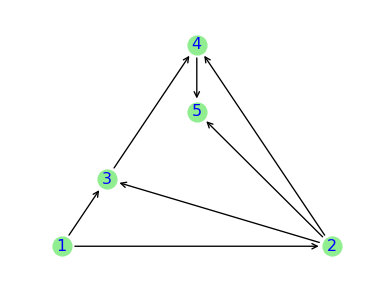

In [9]:
G = nx.MultiGraph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(2,1), (1,3), (2,3), (2,4), (2,5), (5,4), (4,3)])

L = nx.laplacian_matrix(G).todense()
aG.pr("<p>A Graph and its Laplacian matrix</p>")
pn.Row( pn.pane.Matplotlib( aG.draw_nxmultigraph(G, nx.planar_layout, arrows='->'), dpi=96,  height=200),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( 'Laplacian Matrix $L = '+aG.format_matrix(L,False)+'$' ))
      )

**Remark:**
* The Laplacian matrix $L$ is **symmetrix**
* The row and column sums of $L$ are zero.<br>
Thus $L$ has a zero eigenvalue with an eigenvector $\mathbf{1}$.

For directed graphs, either the indegree or outdegree might be used, depending on the application,<br>
$\qquad$ as in the following example:

In [10]:
G = nx.MultiDiGraph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(1,2), (2,1), (1,3), (2,3), (2,4), (2,5), (5,4), (4,3),(2,5)])

inD  = np.diag([ d for i,d in G.in_degree()])
outD = np.diag([ d for i,d in G.out_degree()])
A    = nx.adjacency_matrix(G).todense()
aG.pr("<p>A Directed Graph and its in degree and outdegree Laplacians</p>")
pn.Row( pn.pane.Matplotlib( aG.draw_nxmultigraph(G, nx.circular_layout, arrows='->'), dpi=96,  height=200),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( '$L_{in} = '+aG.format_matrix(inD-A, False)+'$' )),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( '$L_{out} = '+aG.format_matrix(outD-A, False)+'$' ))
      )

<strong style="font-size:20px;height:25px;color:blue;"><p>A Directed Graph and its in degree and outdegree Laplacians</p></strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=200)
    [1] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')
    [2] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')